In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục test
test_dir = r'D:\HuynhKom\chest_xray\test'

# Tạo test generator
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Không shuffle để đảm bảo thứ tự dự đoán và thực tế khớp nhau
)


Found 624 images belonging to 2 classes.


In [5]:
# Tải mô hình đã lưu
model = tf.keras.models.load_model('pneumonia_classifier_model.keras')

# Dự đoán kết quả trên tập test
predictions = model.predict(test_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)  # Nếu xác suất > 0.5 thì là PNEUMONIA (1), ngược lại là NORMAL (0)


c:\Users\anhkh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 422ms/step


In [6]:
# Lấy nhãn thực tế từ test_generator
true_classes = test_generator.classes

# Tính Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[191  43]
 [ 15 375]]


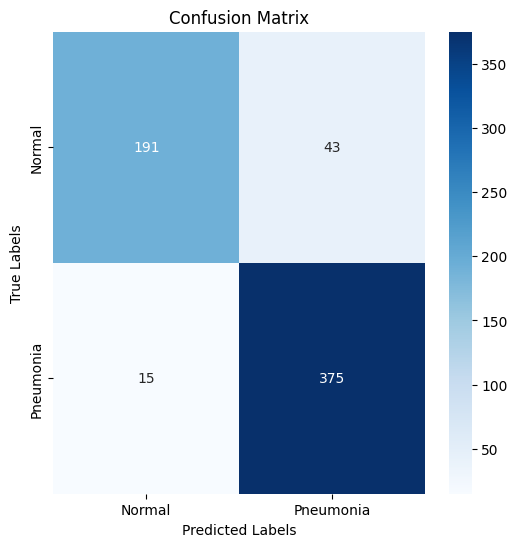

In [7]:
# Vẽ Confusion Matrix với Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# In báo cáo đánh giá
report = classification_report(true_classes, predicted_classes, target_names=['Normal', 'Pneumonia'])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.82      0.87       234
   Pneumonia       0.90      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624

